# Load libraries

In [80]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

import os
import glob

# Load and Combine Datasets

In [81]:
# Make a list of all the decade dataset file names.
all_file_names = [i for i in glob.glob('*.csv')]

# Sort the list so decades appear in chronological order.
all_file_names = sorted(all_file_names, key=lambda decade: int(decade[-9:-5]))

all_decades = []
for file_name in all_file_names:
    # Create the dataframe.
    decade = pd.DataFrame(pd.read_csv(file_name))
    # Name the dataframe by the decade.
    decade.name = file_name[-9:-5]
    all_decades.append(decade)

# Add a decade column to each decade dataframe.
for decade in all_decades:
    decade['decade'] = int(decade.name)

# Combine all decades into one dataframe.
df = pd.concat([f for f in all_decades ], ignore_index = True)

# Dataset Information

In [144]:
# Total number of tracks.
print(str(len(df.index)-1) + ' tracks')

# Head of dataset.
print(df.head())

41105 tracks
                   track            artist  \
0  Jealous Kind Of Fella     Garland Green   
1          Initials B.B.  Serge Gainsbourg   
2           Melody Twist       Lord Melody   
3          Mi Bomba Sonó        Celia Cruz   
4            Uravu Solla       P. Susheela   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3    -7.727   
1  spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   -12.475   
2  spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   -13.392   
3  spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   -12.058   
4  spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11    -3.515   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0403         0.490          0.000000    0.0779    0.845   
1     1       0.0337         0.018          0.107000    0.1760    0.797   
2   

# Data Cleaning

In [142]:
# Check for null values in the dataframe.
print('Dataset contains null values' if df.isnull().values.any() else 'No null values')
print(df.isnull().sum())

No null values
track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decade              0
dtype: int64


# Data Analysis

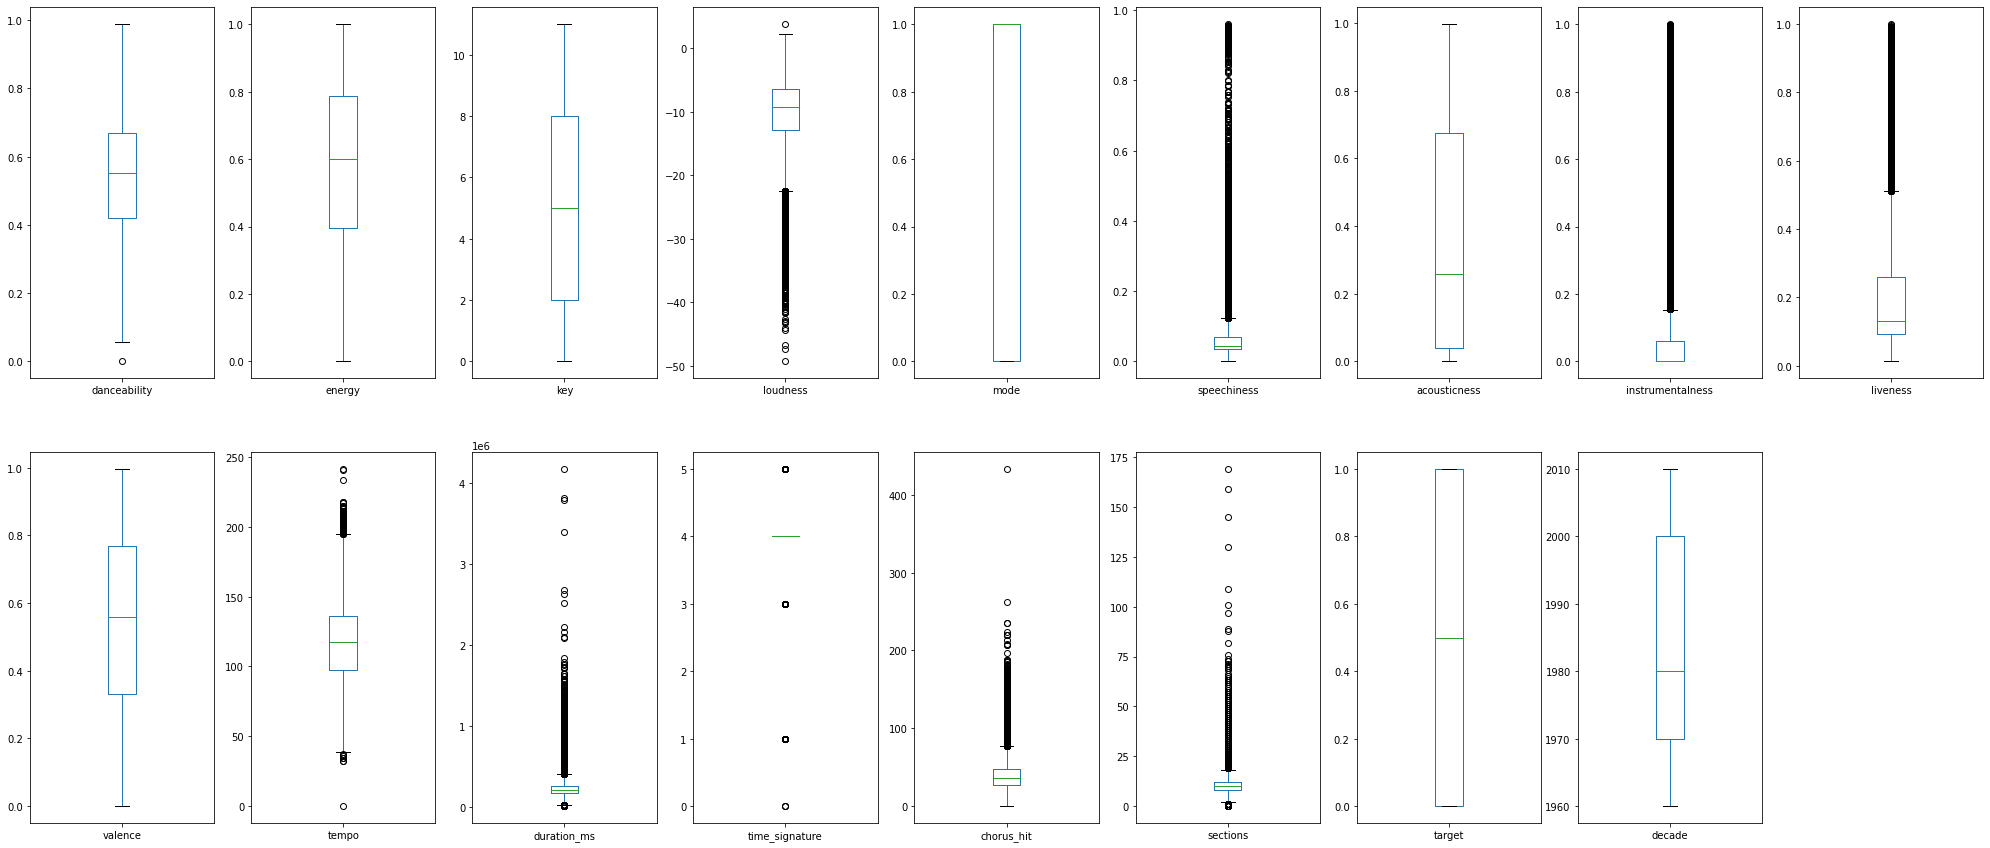

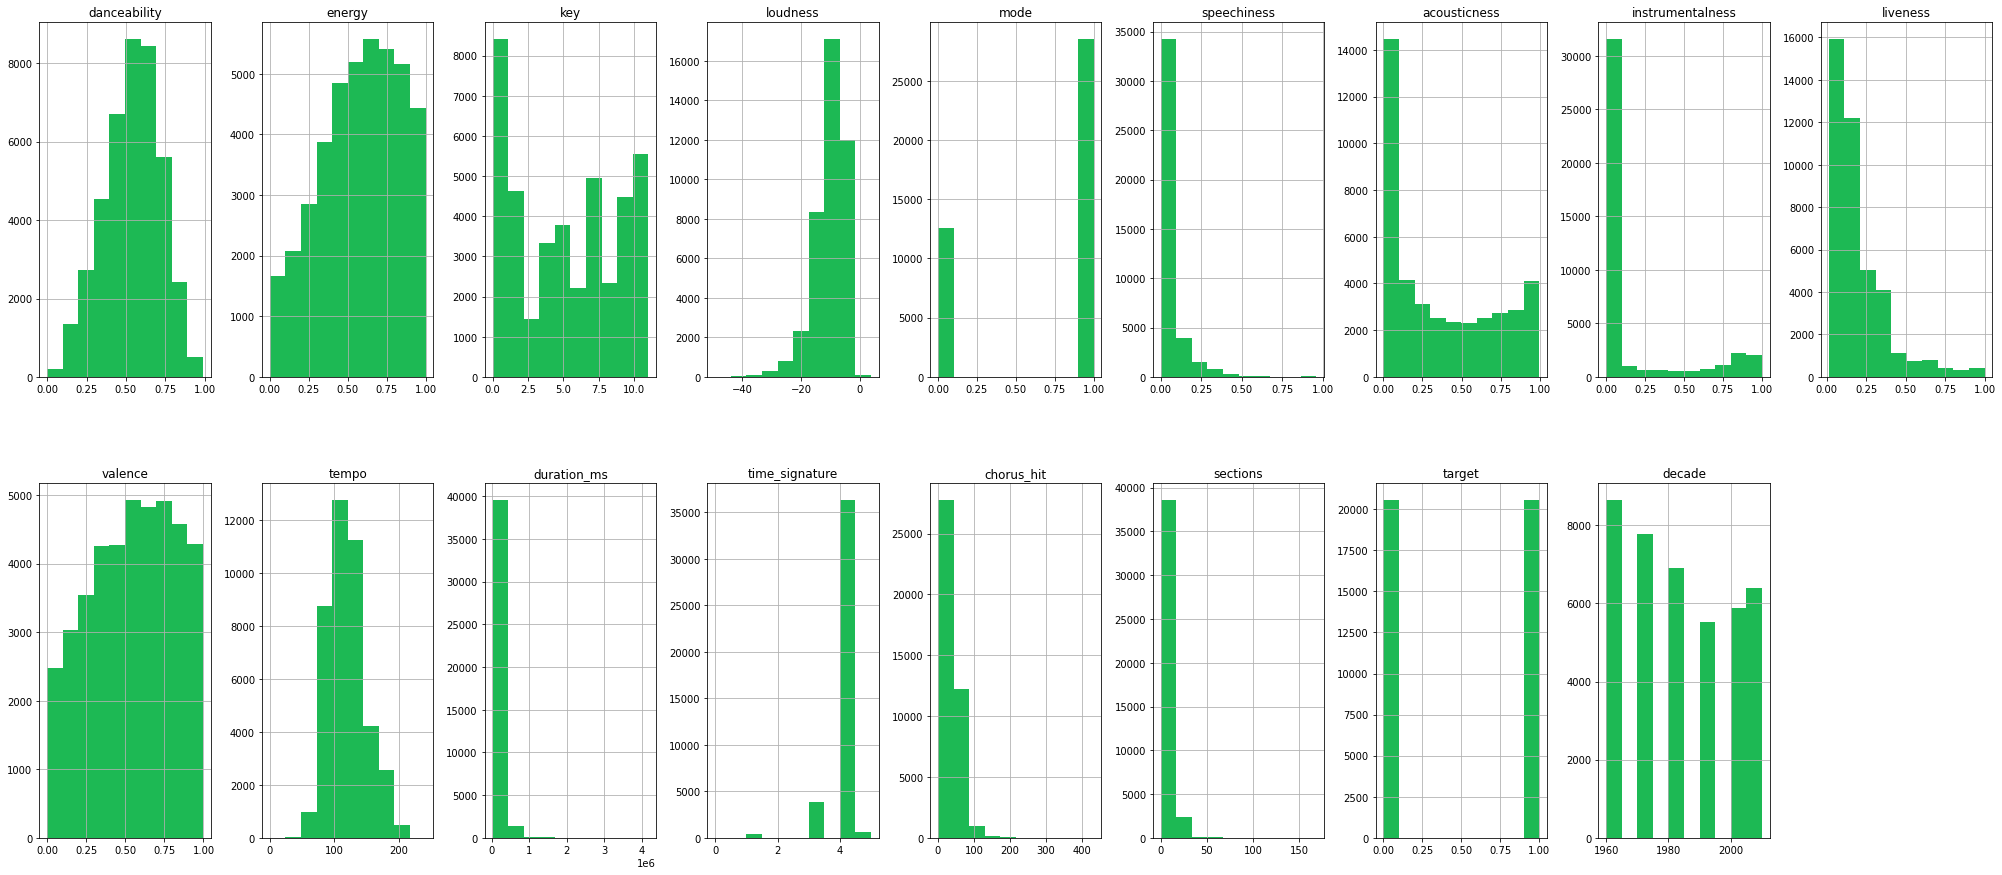

In [131]:
# Box and whisker plots for each feature.
df.plot(kind='box', subplots=True, layout=(2,9), figsize=(35,15))

# Histograms for each feature.
df.hist(layout=(2,9), color = '#1DB954', figsize=(35,15))
pyplot.show()

# Data Splitting

In [181]:
data = {}

# Iterate through each decade.
for decade, tracks in df.groupby('decade'):
    tracks_array = tracks.values

    # Features to be used for prediction.
    X = tracks_array[:,0:18]

    # 'hit' (1) or 'flop' (0) column to predict.
    Y = tracks_array[:,18]

    # Split data between training and testing in a 4:1 ratio respectively.
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

    # Collect the split data into a dictionary.
    decade_data = {
        'X_train': X_train,
        'X_test': X_test,
        'Y_train': Y_train,
        'Y_test': Y_test
    }

    data[decade] = decade_data


# Random Forest Classifer

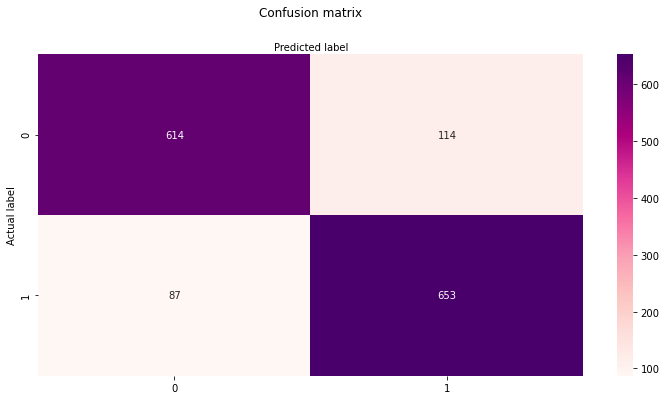

In [66]:
indep_columns = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']

X = dataset[indep_columns]
y = dataset['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) #use 75% of the data for training the model and 25% of the model for testing
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#create a figure/heatmap of the confusion matrix for a better visual
pyplot.rcParams['figure.figsize']=(10,5)
class_names=[0,1] # name  of classes
fig, ax = pyplot.subplots()
tick_marks = np.arange(len(class_names))
pyplot.xticks(tick_marks, class_names)
pyplot.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
pyplot.tight_layout()
pyplot.title('Confusion matrix', y=1.1)
pyplot.ylabel('Actual label')
pyplot.xlabel('Predicted label')
pyplot.show()

# Predictions

0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



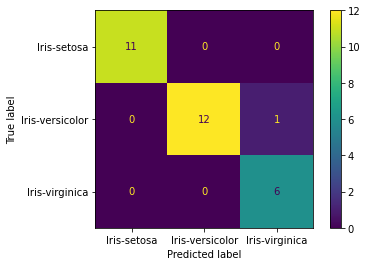

In [43]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(plot_confusion_matrix(model, X_validation, Y_validation))